In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%precision 3

'%.3f'

In [4]:
boston = pd.read_csv('../data/boston_house_prices.csv')

In [5]:
# 13개의 독립변수와 MEDV 간의 상관계수 계산
correlation_matrix = boston.corr()['MEDV'].iloc[:-1]  # MEDV와의 상관계수
print(correlation_matrix)

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Name: MEDV, dtype: float64


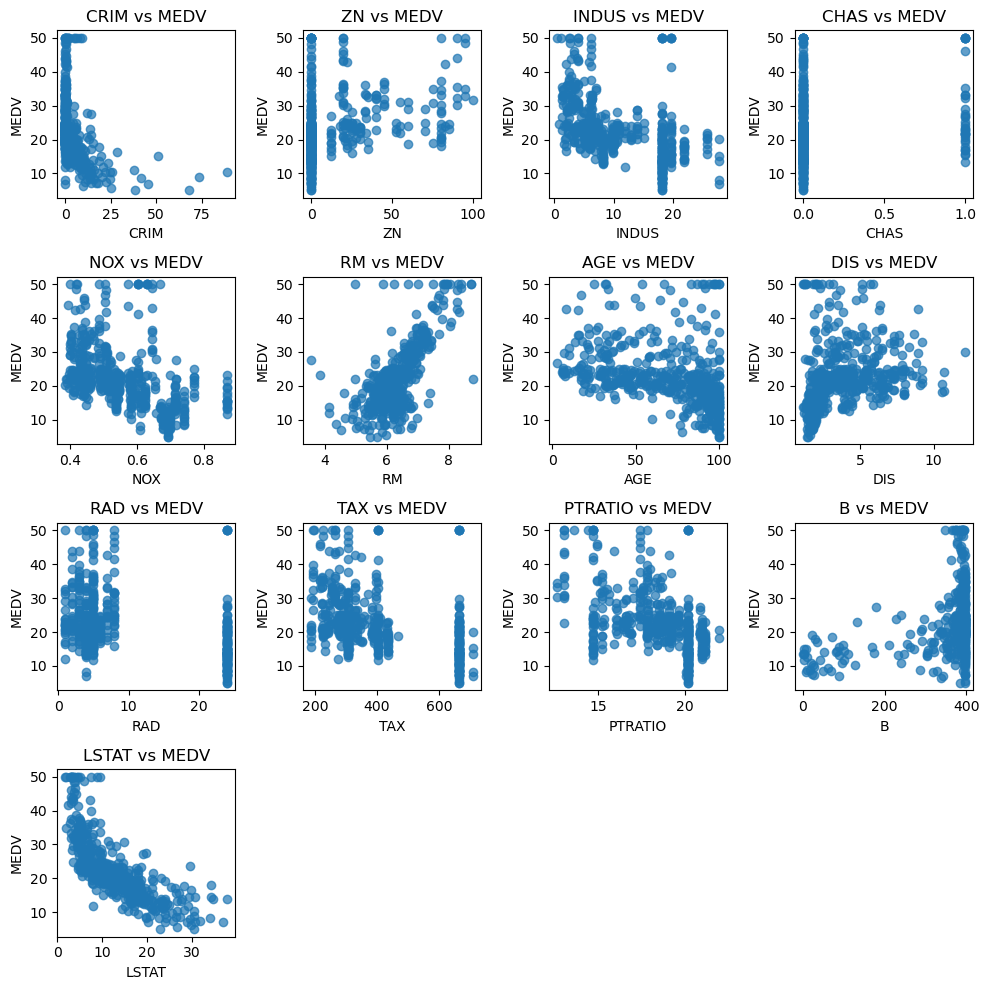

In [6]:
# 각 독립변수와 MEDV의 산점도 그리기
features = boston.columns[:-1]  # MEDV를 제외한 독립변수들

plt.figure(figsize=(10, 10))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i + 1)
    plt.scatter(boston[feature], boston['MEDV'], alpha=0.7)
    plt.title(f'{feature} vs MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
plt.tight_layout()
plt.savefig("../output/boston_scatter_plot.png")
plt.show()

In [7]:
# OLS 모형

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 학습용 데이터와 검증용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(boston.iloc[:, :-1], boston['MEDV'], test_size=0.25, random_state=100)

# 절편 추가
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# OLS 회귀 모형 훈련
model_ols = sm.OLS(y_train, X_train).fit()

# 예측
y_pred = model_ols.predict(X_test)

# MSE 및 R^2 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

# OLS 회귀 결과 요약
print(model_ols.summary())

MSE: 27.173144173043447
R^2: 0.7246154314616755
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     80.81
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           7.66e-99
Time:                        01:00:30   Log-Likelihood:                -1110.2
No. Observations:                 379   AIC:                             2248.
Df Residuals:                     365   BIC:                             2304.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

In [8]:
# 릿지 모형

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# 학습용 데이터와 검증용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(boston.iloc[:, :-1], boston['MEDV'], test_size=0.25, random_state=100)

# 릿지 회귀 모형 훈련
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)

# 예측
y_pred = model_ridge.predict(X_test)

# MSE 및 R^2 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'R^2: {r2}')

MSE: 27.977116831513904
R^2: 0.7164676197009321
